In [ ]:
import requests 
import pandas as pd
import seaborn as sns
link = "https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_status.json"
r = requests.get(link)

In [ ]:
df = pd.json_normalize(r.json()['data']['stations'])
df["mechanical"] = df["num_bikes_available_types"].apply(lambda x: x[0]["mechanical"])
df["ebike"] = df["num_bikes_available_types"].apply(lambda x: x[1]["ebike"])
df

,stationCode,station_id,num_bikes_available,numBikesAvailable,num_bikes_available_types,num_docks_available,numDocksAvailable,is_installed,is_returning,is_renting,last_reported,mechanical,ebike
0,16107,213688169,6,6,"[{'mechanical': 1}, {'ebike': 5}]",29,29,1,1,1,1669574941,1,5
1,31104,653222953,26,26,"[{'mechanical': 17}, {'ebike': 9}]",4,4,1,1,1,1669575096,17,9
2,11104,516709288,0,0,"[{'mechanical': 0}, {'ebike': 0}]",20,20,1,1,1,1669574652,0,0
3,9020,36255,0,0,"[{'mechanical': 0}, {'ebike': 0}]",21,21,1,1,1,1669574978,0,0
4,12109,37815204,23,23,"[{'mechanical': 19}, {'ebike': 4}]",4,4,1,1,1,1669575095,19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,18023,54000604,8,8,"[{'mechanical': 2}, {'ebike': 6}]",23,23,1,1,1,1669575132,2,6
1447,18026,43247738,8,8,"[{'mechanical': 1}, {'ebike': 7}]",25,25,1,1,1,1669575103,1,7
1448,18024,102311820,4,4,"[{'mechanical': 0}, {'ebike': 4}]",30,30,1,1,1,1669574536,0,4
1449,42004,368766689,26,26,"[{'mechanical': 20}, {'ebike': 6}]",4,4,1,1,1,1669574953,20,6


In [ ]:
# export du fichier
df.to_csv("velib.csv")

# essais de Boxplots avec une variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


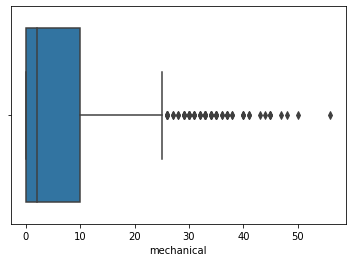

In [ ]:
sns.boxplot(df["mechanical"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


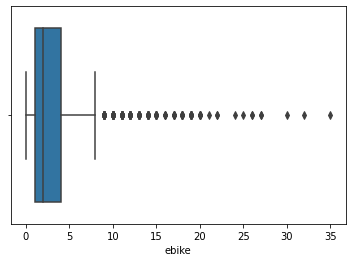

In [ ]:
sns.boxplot(df["ebike"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


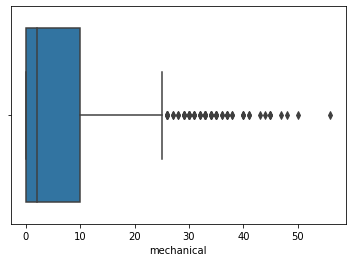

In [ ]:
option_velo = "mechanical"
sns.boxplot(df[option_velo])

# Stations et coordonnées géographiques

In [ ]:
link_station = "https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_information.json"
r_stations = requests.get(link_station)

In [ ]:
df_stations = pd.json_normalize(r_stations.json()['data']['stations'])
df_stations

,station_id,name,lat,lon,capacity,stationCode,rental_methods
0,213688169,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,16107,NaN
1,653222953,Mairie de Rosny-sous-Bois,48.871257,2.486581,30,31104,[CREDITCARD]
2,516709288,Charonne - Robert et Sonia Delauney,48.855908,2.392571,20,11104,NaN
3,36255,Toudouze - Clauzel,48.879296,2.337360,21,9020,[CREDITCARD]
4,37815204,Mairie du 12ème,48.840855,2.387555,30,12109,NaN
...,...,...,...,...,...,...,...
1446,54000604,Ordener - Poissonniers,48.891214,2.351289,35,18023,[CREDITCARD]
1447,43247738,Ruisseau - Ordener,48.892995,2.340145,35,18026,[CREDITCARD]
1448,102311820,Clignancourt - Ordener,48.891458,2.348636,35,18024,[CREDITCARD]
1449,368766689,Westermeyer - Paul Vaillant-Couturier,48.819116,2.396664,25,42004,[CREDITCARD]


In [ ]:
df_merge = pd.merge(left = df,
         right = df_stations,
         on = "station_id")
df_merge.head(2)

,stationCode_x,station_id,num_bikes_available,numBikesAvailable,num_bikes_available_types,num_docks_available,numDocksAvailable,is_installed,is_returning,is_renting,last_reported,mechanical,ebike,name,lat,lon,capacity,stationCode_y,rental_methods
0,16107,213688169,6,6,"[{'mechanical': 1}, {'ebike': 5}]",29,29,1,1,1,1669575273,1,5,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,16107,NaN
1,31104,653222953,26,26,"[{'mechanical': 17}, {'ebike': 9}]",4,4,1,1,1,1669575369,17,9,Mairie de Rosny-sous-Bois,48.871257,2.486581,30,31104,[CREDITCARD]


Density map

In [ ]:
import plotly.express as px
fig = px.density_mapbox(df_merge, 
                        lat='lat', 
                        lon='lon', 
                        z='mechanical', 
                        radius=20,
                        center=dict(lat=48.865983, lon=2.275725	), 
                        zoom=10,
                        mapbox_style="stamen-terrain")
fig.show()